In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
from transformers import AutoTokenizer, AutoModel

In [2]:
df = pd.read_csv('data/producthunt_train.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56702 entries, 0 to 56701
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             56702 non-null  int64 
 1   slug           56702 non-null  object
 2   name           56702 non-null  object
 3   tagline        56702 non-null  object
 4   commentsCount  56702 non-null  int64 
 5   dateAdded      56702 non-null  object
 6   timeAdded      56702 non-null  object
 7   topics         56098 non-null  object
 8   votesCount     56702 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 3.9+ MB


In [7]:
df.head()

,id,slug,name,tagline,commentsCount,dateAdded,timeAdded,topics,votesCount
0,0,superannotate-desktop,SuperAnnotate Desktop,Super easy and fast ML annotations on your PC,93,2020-10-29,07:18:00,"Windows, Mac, SaaS, Developer Tools, Artificia...",660
1,1,pricing-page,Pricing Page,No-code pricing pages with Stripe checkout,4,2021-06-20,15:31:23,"SaaS, E-Commerce",140
2,2,infinitemail,Infinitemail,The better way to get email marketing done for...,19,2023-06-05,07:23:32,"Design Tools, Email Marketing, Marketing",77
3,3,quarter-super-charge-powerbank,Quarter Super Charge Powerbank,The first powerbank using the MagSafe for supe...,10,2015-10-23,07:14:22,Tech,126
4,4,stickymappers,Stickymappers,The sexiest green stickers on the iMessage store.,3,2016-10-05,07:03:00,"Messaging, Tech",122


In [3]:
df['datetime'] = pd.to_datetime(df['dateAdded'] + ' ' + df['timeAdded'])
df['dateAdded'] = pd.to_datetime(df['dateAdded'])

In [20]:
# df.drop(['dateAdded', 'timeAdded'], axis=1, inplace=True)

In [21]:
df

,id,slug,name,tagline,commentsCount,topics,votesCount,datetime
0,0,superannotate-desktop,SuperAnnotate Desktop,Super easy and fast ML annotations on your PC,93,"Windows, Mac, SaaS, Developer Tools, Artificia...",660,2020-10-29 07:18:00
1,1,pricing-page,Pricing Page,No-code pricing pages with Stripe checkout,4,"SaaS, E-Commerce",140,2021-06-20 15:31:23
2,2,infinitemail,Infinitemail,The better way to get email marketing done for...,19,"Design Tools, Email Marketing, Marketing",77,2023-06-05 07:23:32
3,3,quarter-super-charge-powerbank,Quarter Super Charge Powerbank,The first powerbank using the MagSafe for supe...,10,Tech,126,2015-10-23 07:14:22
4,4,stickymappers,Stickymappers,The sexiest green stickers on the iMessage store.,3,"Messaging, Tech",122,2016-10-05 07:03:00
...,...,...,...,...,...,...,...,...
56697,56697,reason8-ai-2-0,Reason8.AI 2.0,Turn conversations 💬 into summaries 📝,40,"Android, iOS, Productivity, Meetings, Artifici...",507,2018-05-09 07:01:00
56698,56698,project-pulse,Project Pulse,Project status pages communicate progress for you,10,Tech,81,2015-03-09 15:08:03
56699,56699,ux-toolkit-for-figma,UX Toolkit for Figma,"Create beautiful user flow charts, sitemaps an...",27,"Design Tools, User Experience",548,2020-07-23 07:33:21
56700,56700,studiolight-co,studiolight.co,Airbnb for photo studios,4,Tech,127,2015-05-02 13:35:26


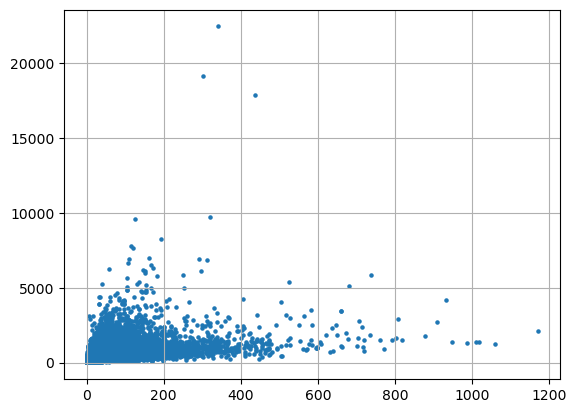

In [15]:
plt.scatter(df['commentsCount'], df['votesCount'], s=5)
plt.grid(True)

plt.show()

No visible correlation of num_of_comments with scores has not been discovered 

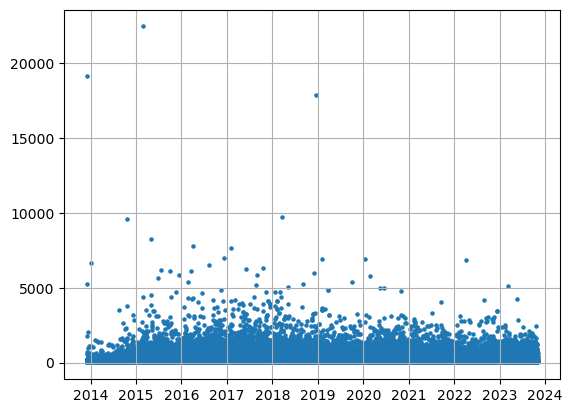

In [26]:
plt.scatter(df['dateAdded'], df['votesCount'], s=5)
plt.grid(True)


plt.show()

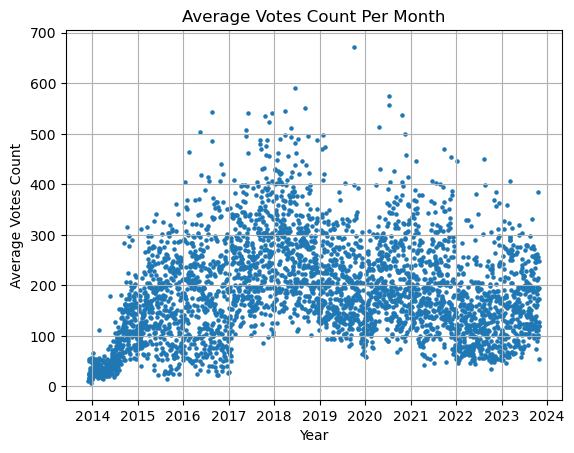

In [46]:
tmp_df = df.set_index('datetime')
tmp_df = tmp_df['votesCount']

# Resample by month ('M') and calculate the mean
yearly_mean = tmp_df.resample('D').median()

# Reset the index to get 'datetime' column for plotting
yearly_mean_df = yearly_mean.reset_index()

# Plotting
plt.scatter(yearly_mean_df['datetime'], yearly_mean_df['votesCount'], s=5)
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Median Votes Count')
plt.title('Median Votes Count Per Day')

plt.show()

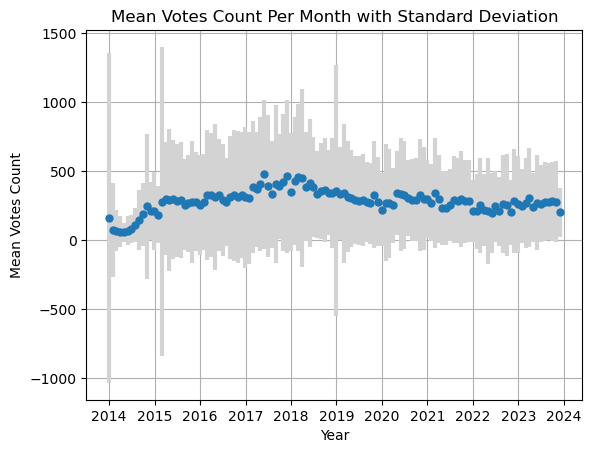

In [56]:
# import matplotlib.pyplot as plt
# import pandas as pd

# Assuming df is your existing DataFrame with a 'datetime' and 'votesCount' column
tmp_df = df.set_index('datetime')
tmp_df = tmp_df['votesCount']

# Resample by month ('M') and calculate the median and standard deviation
monthly_stats = tmp_df.resample('M').agg(['mean', 'std'])

# Reset the index to get 'datetime' column for plotting
monthly_stats_df = monthly_stats.reset_index()

# Plotting
plt.errorbar(monthly_stats_df['datetime'], monthly_stats_df['mean'], yerr=monthly_stats_df['std'], fmt='o', markersize=5, ecolor='lightgray', elinewidth=3, capsize=0)
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Mean Votes Count')
plt.title('Mean Votes Count Per Month with Standard Deviation')

plt.show()


Seems like overall score depend on time when project was launched, howecer there is still big variance in data per day

## Analysing the categories

In [4]:
split_topics = df.dropna(subset=['topics'])['topics'].str.split(',')

# Flatten the list of lists into a single list
flattened_topics = [item.strip() for sublist in split_topics for item in sublist]

# Get unique categories
unique_topics = set(flattened_topics)

# Convert the set to a list if you need a list format
unique_topics_list = list(unique_topics)

In [5]:
len(unique_topics_list)

403

In [52]:
df_exploded = df.assign(topics=df['topics'].str.split(',')).explode('topics')

# Strip whitespace from the 'topics' column
df_exploded['topics'] = df_exploded['topics'].str.strip()

# Group by the 'topics' and calculate the mean of 'votesCount'
category_avg_scores = df_exploded.groupby('topics')['votesCount'].mean()

# Sort the average scores
sorted_avg_scores = category_avg_scores.sort_values(ascending=False)

# Convert the sorted Series to a DataFrame
sorted_avg_scores_df = sorted_avg_scores.reset_index()
sorted_avg_scores_df.columns = ['Category', 'AverageScore']

In [57]:
# Assuming df_exploded is already defined and 'topics' column is cleaned

# Group by the 'topics', calculate the mean and variance of 'votesCount'
category_stats = df_exploded.groupby('topics')['votesCount'].agg(['mean', 'var'])

# Sort by variance
category_stats_sorted_by_variance = category_stats.sort_values(by='var', ascending=False)

# Reset the index to turn the 'topics' index into a column
category_stats_sorted_by_variance = category_stats_sorted_by_variance.reset_index()

# Rename the columns
category_stats_sorted_by_variance.columns = ['Category', 'AverageScore', 'Variance']

# Now category_stats_sorted_by_variance DataFrame includes the variance and is sorted by it


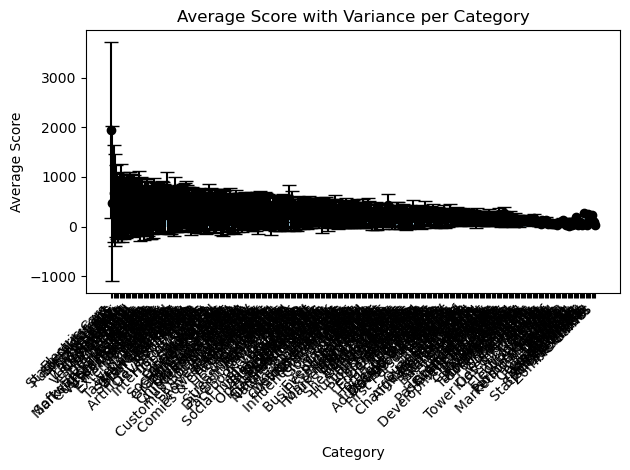

In [60]:
# import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'category_stats_sorted_by_variance' with 'Category', 'AverageScore', and 'Variance'

# Number of categories
n_categories = len(category_stats_sorted_by_variance)

# Create a bar plot
plt.bar(range(n_categories), category_stats_sorted_by_variance['AverageScore'], color='skyblue', alpha=0.7)

# Add error bars
# Note: Standard deviation is the square root of the variance
plt.errorbar(range(n_categories), category_stats_sorted_by_variance['AverageScore'], 
             yerr=category_stats_sorted_by_variance['Variance']**0.5, fmt='o', color='black', capsize=5)

# Set the x-ticks to be the category names
plt.xticks(range(n_categories), category_stats_sorted_by_variance['Category'], rotation=45, ha='right')

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Average Score')
plt.title('Average Score with Variance per Category')

# Show plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


seems like i have to train language model...

## Transformer from hugging face

In [62]:
data = df

In [63]:
# Exploding the 'topics' column into separate rows
data['topics'] = data['topics'].str.split(', ')
exploded_topics = data.explode('topics')

# One-hot encoding of topics
topics_encoded = pd.get_dummies(exploded_topics['topics'])

# Group by 'id' and sum to get back to original shape
topics_encoded = topics_encoded.groupby(exploded_topics.index).sum()


In [66]:
# Initialize tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
model = AutoModel.from_pretrained('distilbert-base-uncased')

# Function to encode text to embeddings
def encode_text(texts):
    with torch.no_grad():
        encoded_input = tokenizer(texts, padding=True, truncation=True, return_tensors='pt', max_length=512)
        output = model(**encoded_input)
    return output.last_hidden_state.mean(dim=1).numpy()

# Convert taglines to embeddings
tagline_embeddings = encode_text(data['tagline'].tolist())


In [ ]:
# Convert tagline embeddings to DataFrame
tagline_embeddings_df = pd.DataFrame(tagline_embeddings)

# Concatenate embeddings with encoded topics
final_features = pd.concat([tagline_embeddings_df, topics_encoded.reset_index(drop=True)], axis=1)
